# Swimming Velocity

We can finally get around to seeing how a Purcell swimmer behaves for different values of $\eta$ and $\phi$. 

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style("white")
import stokeslets as slts
import purcell as pur

In [2]:
figfile = "figs/"

In [3]:
def velocity(pswimmer):
    #assumes only pswimmer values for a single cycle were provided
    v = np.mean(pswimmer[-1].T[0])
    return v

Import $P_0$ values.

In [4]:
Tau = pd.read_csv("P0.csv", index_col=0); Tau

,0.06544984694978735,0.1308996938995747,0.19634954084936207,0.2617993877991494,0.32724923474893675,0.3926990816987241,0.4581489286485115,0.5235987755982988,0.5890486225480862,0.6544984694978736,...,0.9817477042468103,1.0471975511965976,1.112647398146385,1.1780972450961722,1.2435470920459597,1.308996938995747,1.3744467859455343,1.4398966328953218,1.505346479845109,1.5707963267948963
2.0,0.081522,0.163896,0.246763,0.330128,0.414359,0.498971,0.583869,0.671173,0.761676,0.855290,...,1.359881,1.463722,1.571311,1.685704,1.812352,1.943974,2.077370,2.208420,2.349472,2.493022
1.8,0.083310,0.167471,0.252019,0.337295,0.423398,0.510149,0.599817,0.693857,0.789109,0.885657,...,1.379046,1.495794,1.621349,1.754541,1.891847,2.031458,2.174824,2.338158,2.521690,2.697990
2.2,0.079874,0.160599,0.241957,0.323762,0.406547,0.489964,0.573387,0.657209,0.742795,0.830636,...,1.312625,1.415621,1.520405,1.627199,1.737018,1.857081,1.983884,2.106214,2.225595,2.340942


In [5]:
Phi = np.array(Tau.columns).astype('float')
Eta = np.array(Tau.index).astype('float')

Sample over $\phi$ and $\eta$ values and generate net displacement of the swimmer in the X-direction after 1 cycle.

In [6]:
Vel = Tau.copy()
for eti in range(np.size(Eta)):
    for phi in range(np.size(Phi)):
        s,r,tim = pur.init(Eta[eti],Phi[phi],T=8)
        tau = pur.stroke_input(Tau.iloc[eti,phi],tim,r,strokes=1)
        R = slts.mesher(np.arange(-1.5, 1.5, 0.1))
        _,pswimmer = slts.evolve(tau,tim,R,r,s,k=100,e=0.3,c=0.6)
        Vel.iloc[eti,phi] = velocity(pswimmer)

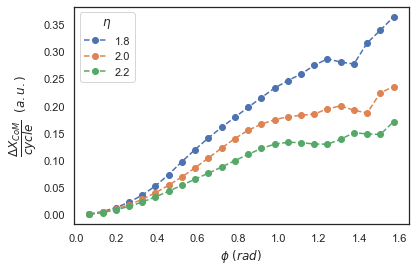

In [7]:
plt.figure(figsize = (6,4))
Eta = np.sort(Eta)
for i,et in enumerate(Eta):
    plt.plot(Phi,Vel.loc[et,:],'o--')
plt.legend(Eta,title="$\eta$")
plt.xlabel('$\phi \ (rad)$')
plt.ylabel(r'$\dfrac{\Delta X_{CoM}}{cycle} \ \ (a.u.)$')
plt.savefig(figfile+"purcell_velocities.png",dpi=300,bbox_inches = 'tight')
plt.show()